### 컨볼루션 예제

padding이 없고, stride가 1일때 예제

1. 이미지의 왼쪽부터 오른쪽 끝까지 순차적으로 훑으면서 컨볼루션 연산 후

2. 결과를 리스트로 담는다.

3. 리스트를 reshape해서, 다시 행렬로 만든다.

<img src="./resource/convolution_ex.png" width="550" height="300">

---

- 가로로 몇번 이동할지:

  영상 X축 길이 - 커널_X_길이 +1
  
  ---
- 세로로 몇번 이동할지:

  영상 Y축 길이 - 커널_Y_길이 +1 

패딩이 없을 때, 이미지 사이즈가 줄어드는 예제.


In [14]:
# ex) 예제 구현
import numpy as np 
f =np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]]) 
k =np.array([[2,0,1],[0,1,2],[1,0,2]]) 
result=[]

f_y, f_x= np.shape(f)# 영상의 크기
k_y, k_x= np.shape(k)#커널의 크기

# 영상_X_길이 - 커널_X_길이 +1  = f_x - k_x + 1  : 가로로 몇번 움직일지.
# stride =1 일때.

# 영상_Y_길이 - 커널_Y_길이 +1  = f_y - k_y + 1  : 세로로 몇번 움직일지.
# stride =1 일때.

print("세로로 ",f_y-k_y,"번 이동")
print("가로로 ",f_x-k_x,"번 이동")


for y in range(f_y-k_y+1):
    for x in range(f_x-k_x+1):
        print(  (f[y:y+k_y, x:x+k_x]* k).sum()  )
        result.append((f[y:y+k_y,x : x+k_x]* k).sum())

result=np.array(result).reshape(2,2)
result


세로로  1 번 이동
가로로  1 번 이동
15
16
6
15


array([[15, 16],
       [ 6, 15]])

---
### 컨볼루션 함수

위 예제는 결과 2 by 2 행렬임을 알고, stride가 1일때 직접 계산함.(하드코딩)

<img src="./resource/convolution_able.png" width="350" height="200">

먼저 합성곱이 가능하려면, 이미지 길이 - 커널길이 가 Stride에 나누어 떨어져야한다.

<img src="./resource/convolution_output_size.png" width="550" height="500">

output size를 알아야지, reshape 해줄때 사용한다.

만약 위 예제 처럼 padding이 0일 때 계산해보면 같음을 볼 수 있다.

<img src="./resource/zero_padding2.PNG" width="550" height="500">

zero padding 인 경우, stride가 1이면 그리고 kernel 크기가 3이면 기존 이미지 사이즈를 유지해준다!

그 외에도 stride가 1일때 커널 사이즈에따라 padding 이 있다.

---

- same padding 만들기

기존 사이즈 유지하는 padding size 찾기

<img src="./resource/same_padding.jpg" width="550" height="500">

---

```
conv(src,kernel,stride=1,padding=None)
- src : 이미지
- kernel : 행렬, 실수형
- stride: 이미지에서 커널의 이동범위(1~, 정수형)
- zero_padding: 이미지의 가장자리에,  행과 열 크기 (padding)만큼 추가 .
  (0~,정수형) 패딩에 들어갈 숫자를 입력.
  (None이면 이미지 사이즈가 유지되도록 자동설정.)
```


In [126]:
import numpy as np 

def conv(src,kernel,stride=1,zero_padding=None):
    result=[]

    f_y, f_x= np.shape(src)# 영상의 크기
    k_y, k_x= np.shape(kernel)#커널의 크기
    
    
    #padding이 없다면, 자동으로 이미지 사이즈 유지하도록 설정.
    if zero_padding is None:
        #same padding 만들기위해 패딩 사이즈 계산.
        padding_y = int((stride * f_y-stride-f_y+k_y)/2)
        
        padding_x = int((stride * f_x-stride-f_x+k_x)/2)
        #print(padding_y,padding_x)
        
        src = np.pad(src, ((padding_y,padding_y),(padding_x,padding_x)), 'constant', constant_values=0)
    elif zero_padding!=0:
        # 0을 제외하고 zero padding
        padding_y=zero_padding
        padding_x=zero_padding
        src = np.pad(src, ((zero_padding,zero_padding),(zero_padding,zero_padding)), 'constant', constant_values=0)
    else:
        #0일때, 패딩을 주지않는다.
        padding_y=0
        padding_x=0
    print("입력 : \n",src)
    
    #이미지 사이즈 다시 계산
    f_y, f_x= np.shape(src)# 영상의 크기
    
    #패딩이 생기면 시작점도 달라야한다.
    start_y = padding_y
    start_x = padding_x
    
    if zero_padding !=0:
        #print('y 좌표 최대 ',f_y-k_y+2)
        #print('x 좌표 최대 ',f_x-k_x+2)
        for y in range(start_y,f_y-k_y+2,stride):
            for x in range(start_x,f_x-k_x+2,stride):
                result.append((src[y-padding_y:y+k_y-padding_y, x-padding_x:x+k_x-padding_x]* kernel).sum())
        #영상 사이즈는 이전 사이즈 그대로.
        OUTPUT_Y=f_y - 2*padding_y
        OUTPUT_X=f_x - 2*padding_x
                
                
    else:
        #print('y 좌표 최대 ',f_y-k_y+1)
        #print('x 좌표 최대 ',f_x-k_x+1)
        for y in range(start_y,f_y-k_y+1,stride):
            for x in range(start_x,f_x-k_x+1,stride):
                result.append((src[y:y+k_y,x : x+k_x]* kernel).sum())
        #영상 크기 계산
        OUTPUT_Y=int( ((f_y-k_y)/stride)+1 )
        OUTPUT_X=int( ((f_x-k_x)/stride)+1 )
        #print(OUTPUT_Y,OUTPUT_X)
        
        
    result=np.array(result).reshape(OUTPUT_Y,OUTPUT_X)
    return result
    
    

In [130]:
print("no padding  시 \n" , conv(f,k,zero_padding=0),"\n")
print("same padding 시 \n",conv(f,k),"\n")
print("filter 2d 사용시 \n", cv2.filter2D(f.astype(np.uint8),-1,k,borderType=0))
#bordeType=0인것이 다른점.

입력 : 
 [[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
no padding  시 
 [[15 16]
 [ 6 15]] 

입력 : 
 [[0 0 0 0 0 0]
 [0 1 2 3 0 0]
 [0 0 1 2 3 0]
 [0 3 0 1 2 0]
 [0 2 3 0 1 0]
 [0 0 0 0 0 0]]
same padding 시 
 [[ 7 12 10  2]
 [ 4 15 16 10]
 [10  6 15  6]
 [ 8 10  4  3]] 

filter 2d 사용시 
 [[ 7 12 10  2]
 [ 4 15 16 10]
 [10  6 15  6]
 [ 8 10  4  3]]


filter 2d 결과 
 [[255   0   0 ...   3   0   0]
 [255   0   0 ...   2   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255   2   8 ...   1   0   0]
 [255   0   2 ...   0   0   0]
 [255   0   0 ...   0   0   0]]
입력 : 
 [[  0   0   0 ...   0   0   0]
 [  0 234 234 ... 254 253   0]
 [  0 234 234 ... 254 253   0]
 ...
 [  0 210 209 ... 236 236   0]
 [  0 209 210 ... 235 235   0]
 [  0   0   0 ...   0   0   0]]
결과 
 [[  702    -2    -2 ...     3    -1  -762]
 [  936    -1    -1 ...     2    -2 -1015]
 [  936     0     0 ...    -1    -2 -1014]
 ...
 [  839     2     8 ...     1    -1  -946]
 [  838    -5     2 ...    -1    -3  -943]
 [  629    -4    -3 ...    -2    -3  -706]]


Text(0.5, 1.0, 'self')

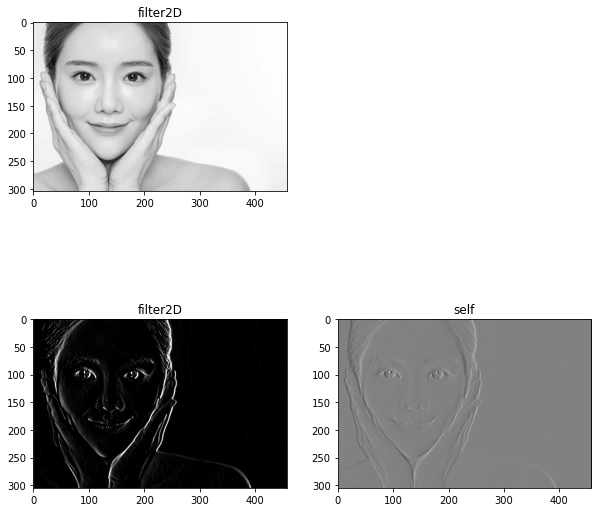

In [129]:
# EX) 소벨 마스크를 이용한 에지 검출. 에지와 관련된 맵들.
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("../data/find_face.jpg",0) # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.

# 소벨 커널을 직접 생성해서 엣지 검출
## 소벨 커널 생성
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])

edge_dx = cv2.filter2D(img, -1, gx_k,borderType=0)
print("filter 2d 결과 \n",edge_dx)
edge_dx_self = conv(src=img, kernel=gx_k)
print("결과 \n",edge_dx_self)


fig =plt.figure(figsize=(10,10))

plt.subplot(221)# 1행 2열중 1번째
plt.imshow(img,'gray')
plt.title('filter2D')

plt.subplot(223)# 1행 2열중 1번째
plt.imshow(edge_dx,'gray')
plt.title('filter2D')


plt.subplot(224)# 1행 2열중 1번째
plt.imshow(edge_dx_self,'gray')
plt.title('self')

#결과가 다른 이유는 최대값과 음수에대한 예외처리로 발생.
#255이상은 255로, 음수는 전부 0

참조:
https://lsh-story.tistory.com/48

https://supermemi.tistory.com/17

https://m.blog.naver.com/wideeyed/221665256911

https://docs.opencv.org/master/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5afe14c13a4ea8b8e3b3ef399013dbae01